<a href="https://colab.research.google.com/github/AyozeGS/IABD/blob/main/SNS/UT4/T1/Ayoze_Gil_Sosa_Act_4_1_Segmentacion_Statlog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ayoze Gil Sosa (Provisional)

# Instalación de paquetes

In [3]:
!pip install ucimlrepo

In [176]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Veamos la representación gráfica de los grupos (clusters)
# y utilizar las librerías  silhouette_samples, silhouette_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

### Instalación del repositorio de la universidad UC Irvine

# Carga de datos

Opciones a elegir:

* Desde el repositorio de UC Irvine
* Desde Github

## Cargar desde UC Irvine

In [156]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# metadatos
statlog_german_credit_data .metadata

{'uci_id': 144,
 'name': 'Statlog (German Credit Data)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data',
 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv',
 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 1000,
 'num_features': 20,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1994,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5NC77',
 'creators': ['Hans Hofmann'],
 'intro_paper': None,
 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in

In [157]:
#variables
statlog_german_credit_data.variables

,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


In [158]:
statlog_german_credit_data.data.keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [159]:
data = statlog_german_credit_data.data.original
data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


## Cargar desde archivo csv en Github

Podemos elegir el archivo german.data con datos categóricos en formato cadena o el dataset con losdatos numéricos. En ambos casos las columnas

In [182]:
#variable para seleccionra origen
github_path = 'https://raw.githubusercontent.com/AyozeGS/IABD/main/SNS/UT4/T1/resources/statlog_german_credit_data/german.data'

data = pd.read_csv(github_path, delim_whitespace=True, header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


A continuación cambiamos el nombre de la columnas, necesario si queremos que el dataset en este punto sea independiente de la fuente. Los datos de github no contienen cabeceras así que queremos añadirlos como aparecen en el dataset de la UCI.

In [183]:
# Editamos los nombres de las columnas a "AtrributeX" para cada columna excepto la columna class
data.columns = ["Attribute" + str(i) for i in range(1,21)] + ['class']
data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


## Normalización

En primer lugar, comprobamos que no haya valores nulos

In [184]:
# Comprobación de valores nulos y NaN, máximos y mínimos para cada característica en los dataset de entrenamiento y test
pd.DataFrame({
  "Tipo": [data[column].dtype for column in data.columns],
  "Train Null ": data.isnull().sum(),
  "Train Nan": data.isna().sum(),
})

,Tipo,Train Null,Train Nan
Attribute1,object,0,0
Attribute2,int64,0,0
Attribute3,object,0,0
Attribute4,object,0,0
Attribute5,int64,0,0
Attribute6,object,0,0
Attribute7,object,0,0
Attribute8,int64,0,0
Attribute9,object,0,0
Attribute10,object,0,0


A continuación editamos los datos para aquellas columnas categóricas, aplicando una forma distinta a que como se ha hecho otras veces por la particularidad del dataset.

En este caso, su valor es el carácter A, el número de columna y el valor de la categoría. En este caso eliminamos las dos primeras partes y pasamos los valores enteros. Lo hacemos de forma separada para las columnas por debajo y encima del 9 por el nñumero de careacteres a recortar.

In [185]:
# Editamos las columnas en el caso de que hayamos cargado datos categóricos de la fuente.
data.iloc[:, :9] = data.iloc[:, :9].applymap(lambda cell: int(cell[2:]) if isinstance(cell, str) else cell) #Columna hasta la 9
data.iloc[:, 9:] = data.iloc[:, 9:].applymap(lambda cell: int(cell[3:]) if isinstance(cell, str) else cell) #Columna desde la 9
data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,2
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,2,1736,1,4,3,2,1,...,1,31,3,2,1,2,1,1,1,1
996,1,30,2,1,3857,1,3,4,1,1,...,2,40,3,2,1,4,1,2,1,1
997,4,12,2,3,804,1,5,4,3,1,...,3,38,3,2,1,3,1,1,1,1
998,1,45,2,3,1845,1,3,4,3,1,...,4,23,3,3,1,3,1,2,1,2


Finalmente editamos el tipo de las columnas a enteros para que guarde correlación con los datos modificados.

In [186]:
# Comprobamos los tipos de columnas que hay
print(data.dtypes.value_counts())

object    13
int64      8
Name: count, dtype: int64


In [187]:
# Comvertimos el tipo de las columnas.
for column in data.columns:
  if data[column].dtype == 'object':
      data[column] = pd.Categorical(data[column]).codes
      data[column] = data[column].astype('int64')

# Comprobamos los tipos de columnas que hay
print(data.dtypes.value_counts())

int64    21
Name: count, dtype: int64


En este ocasión no nos encontramos ante un problema de clasificación por lo que eliminaremos la columna destinada para etiquetar los datos.

In [188]:
data.drop(['class'], axis=1, inplace=True)
data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,0,6,4,3,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0
1,1,48,2,3,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0
2,3,12,4,6,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0
3,0,42,2,2,7882,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0
4,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,2,1736,0,3,3,1,0,4,0,31,2,1,1,1,1,0,0
996,0,30,2,1,3857,0,2,4,0,0,4,1,40,2,1,1,3,1,1,0
997,3,12,2,3,804,0,4,4,2,0,4,2,38,2,1,1,2,1,0,0
998,0,45,2,3,1845,0,2,4,2,0,4,3,23,2,2,1,2,1,1,0


Cuando los atributos de los datos se encuentran en diferentes escalas el modelo puede introducir sesgos hacia los atributos con mayor rango de variación. Por ello, si no se normalizan los datos, un modelo de dará más peso a la característica de mayor rango y esta tendrá más influencia en la medición de similitud.

Es por ello que vamos a escalar todas las columnas entre 0 y 1.

In [189]:
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,0.000000,0.029412,1.00,0.333333,0.050567,1.00,1.00,1.000000,0.666667,0.0,1.000000,0.000000,0.857143,1.0,0.5,0.333333,0.666667,0.0,1.0,0.0
1,0.333333,0.647059,0.50,0.333333,0.313690,0.00,0.50,0.333333,0.333333,0.0,0.333333,0.000000,0.053571,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0
2,1.000000,0.117647,1.00,0.666667,0.101574,0.00,0.75,0.333333,0.666667,0.0,0.666667,0.000000,0.535714,1.0,0.5,0.000000,0.333333,1.0,0.0,0.0
3,0.000000,0.558824,0.50,0.222222,0.419941,0.00,0.75,0.333333,0.666667,1.0,1.000000,0.333333,0.464286,1.0,1.0,0.000000,0.666667,1.0,0.0,0.0
4,0.000000,0.294118,0.75,0.000000,0.254209,0.00,0.50,0.666667,0.666667,0.0,1.000000,1.000000,0.607143,1.0,1.0,0.333333,0.666667,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.50,0.222222,0.081765,0.00,0.75,0.666667,0.333333,0.0,1.000000,0.000000,0.214286,1.0,0.5,0.000000,0.333333,0.0,0.0,0.0
996,0.000000,0.382353,0.50,0.111111,0.198470,0.00,0.50,1.000000,0.000000,0.0,1.000000,0.333333,0.375000,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0
997,1.000000,0.117647,0.50,0.333333,0.030483,0.00,1.00,1.000000,0.666667,0.0,1.000000,0.666667,0.339286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0
998,0.000000,0.602941,0.50,0.333333,0.087763,0.00,0.50,1.000000,0.666667,0.0,1.000000,1.000000,0.071429,1.0,1.0,0.000000,0.666667,0.0,1.0,0.0


# Clustering

## Análisis de siluetas

In [196]:
X = data.copy()

In [197]:
# Establemecemos un límite para realizar una prospección del coeficiente de Silueta (silhouette score)
limit = 10

for k in range(2, limit + 1):
    model = KMeans(n_clusters = k, n_init='auto', random_state=10)
    model.fit(X)
    pred = model.predict(X)
    score = silhouette_score(X, pred)

    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

# Cuanto más alto es el score mejor agrupamiento cluster obtendremos

Silhouette Score for k = 2: 0.146
Silhouette Score for k = 3: 0.124
Silhouette Score for k = 4: 0.102
Silhouette Score for k = 5: 0.092
Silhouette Score for k = 6: 0.102
Silhouette Score for k = 7: 0.090
Silhouette Score for k = 8: 0.091
Silhouette Score for k = 9: 0.083
Silhouette Score for k = 10: 0.088


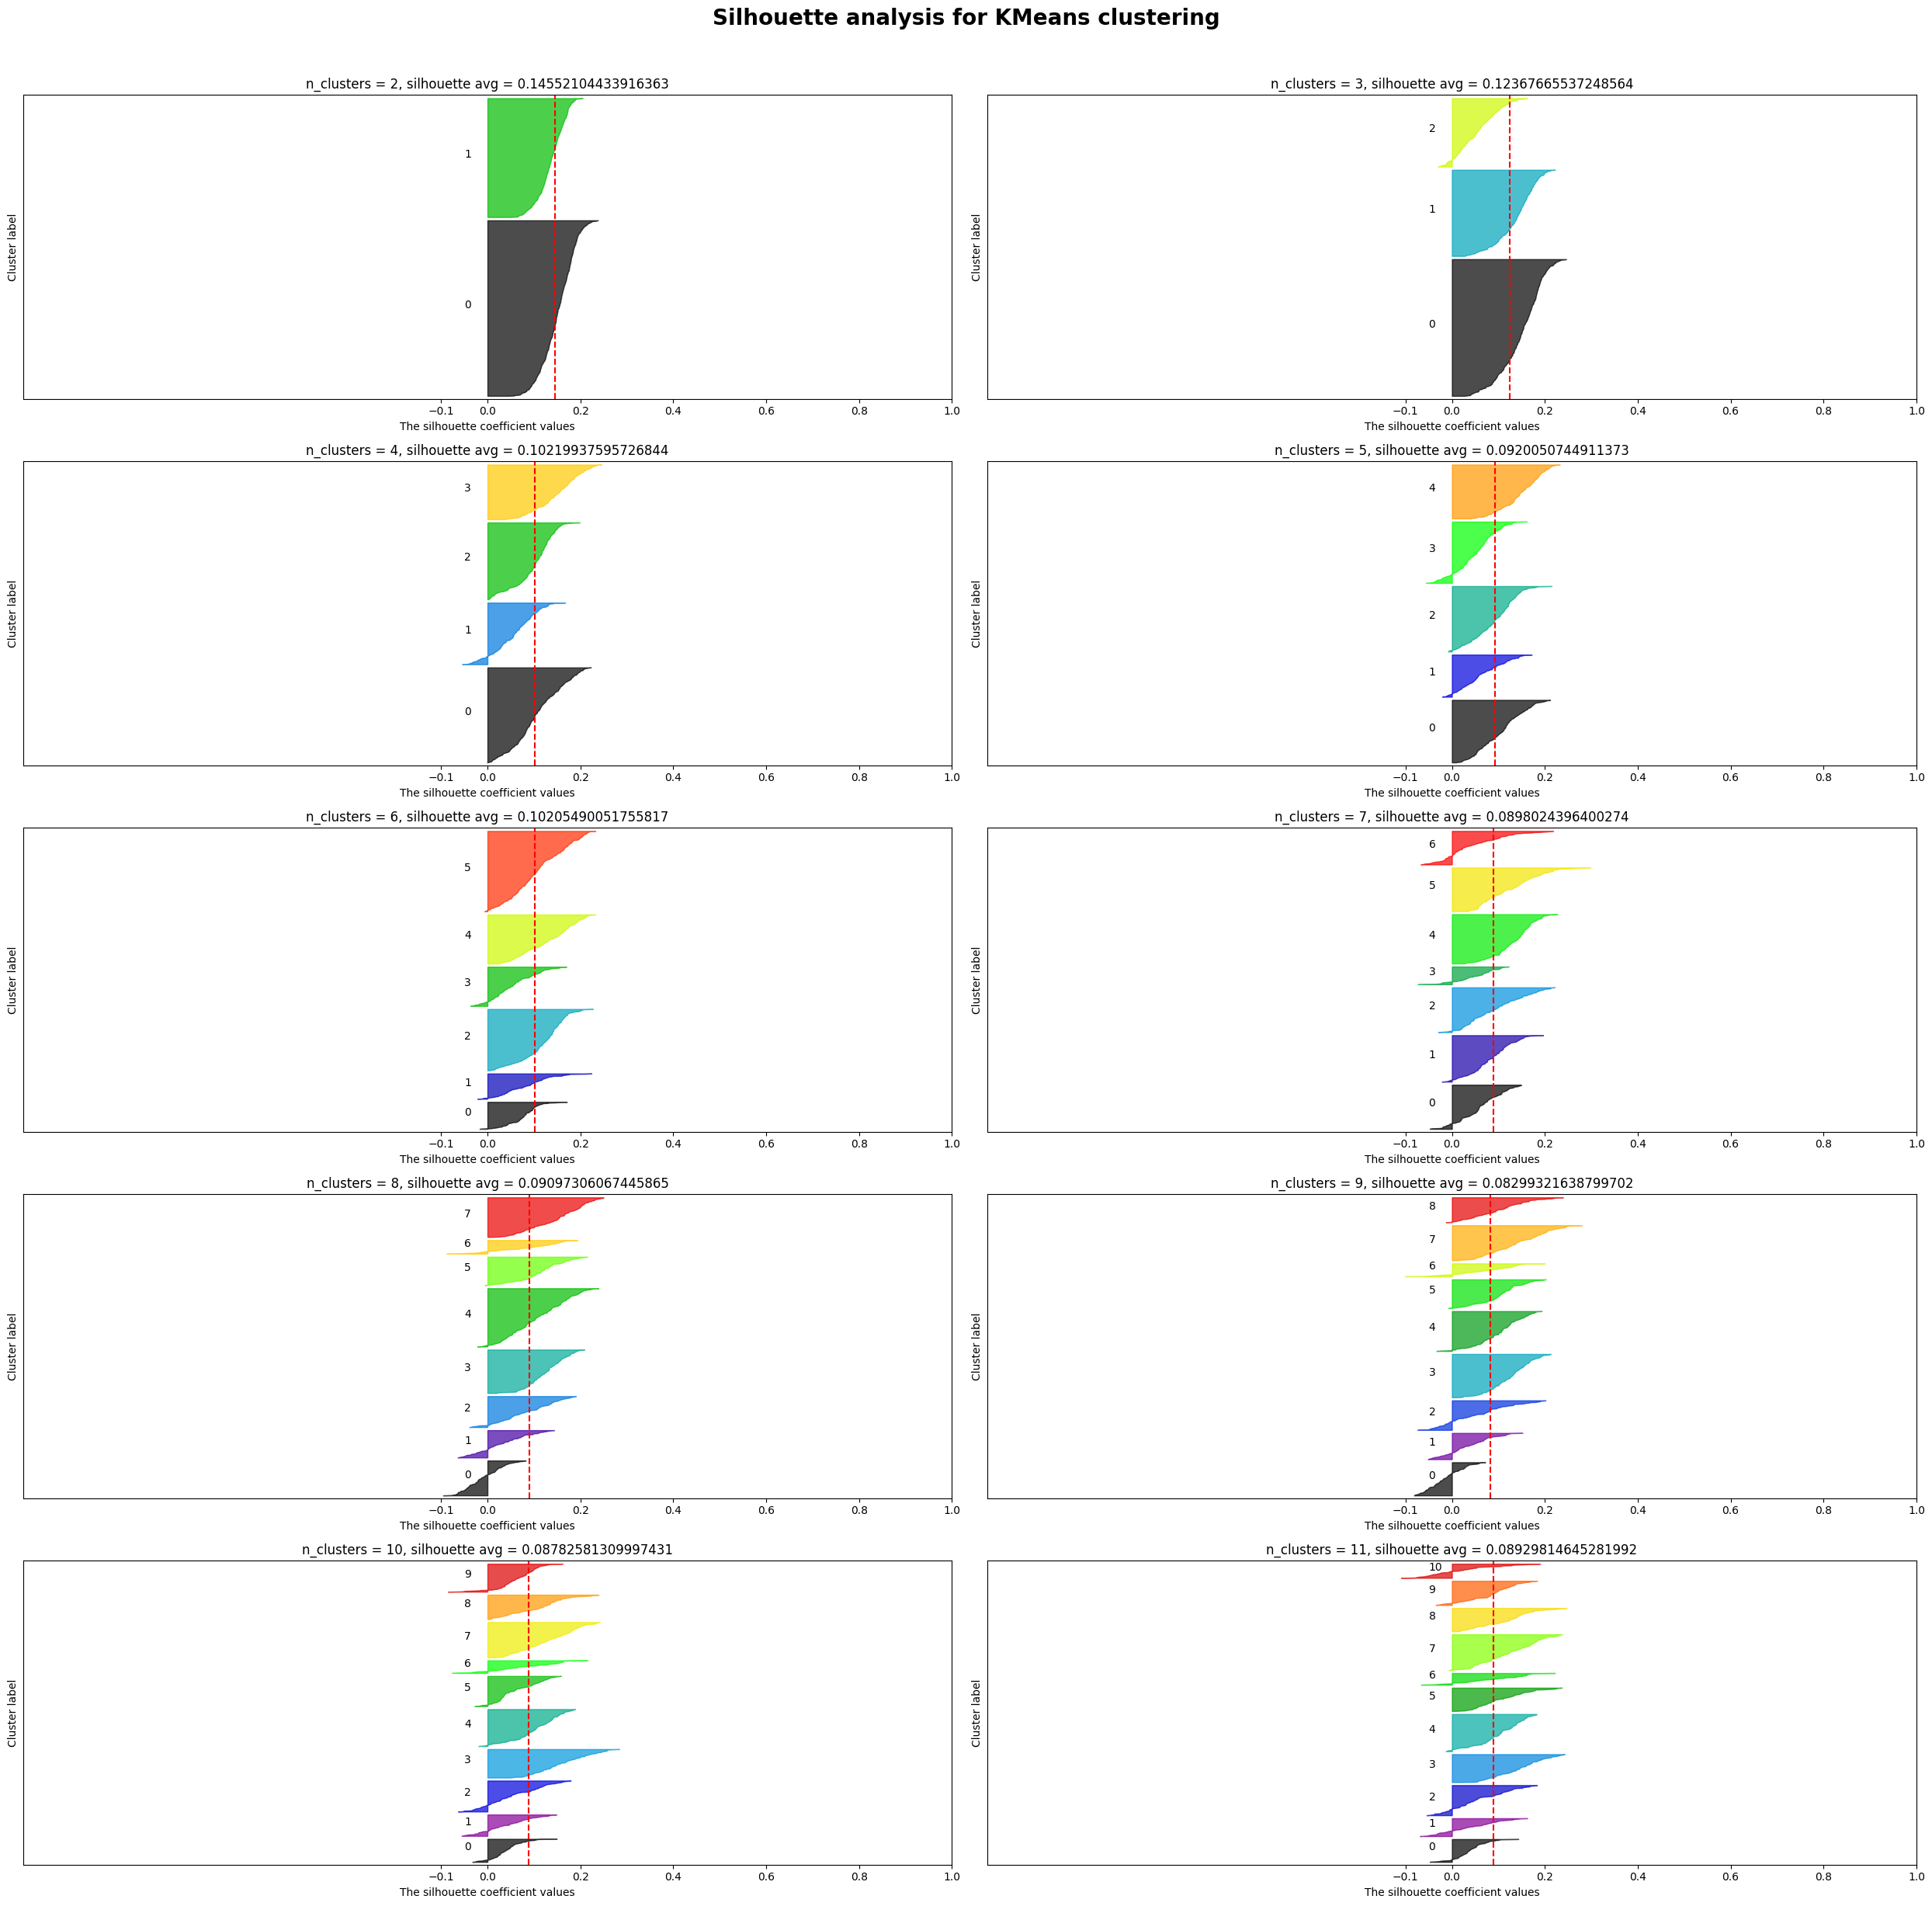

In [231]:
nrows = 5
ncols = 2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(25,25))

limit = 11

for n_clusters in range(2, limit + 1):
    # Crea una subparcela con 1 fila y 2 columnas
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    ax_row = (n_clusters-2) // ncols
    ax_column = (n_clusters-2) % ncols
    ax1 = ax[ax_row][ax_column]

    # La primera subtrama es la trama de silueta
    # El coeficiente de silueta puede oscilar entre -1, 1
    ax1.set_xlim([-1, 1])
    # El (n_clusters + 1) * 10 es para insertar un espacio en blanco entre la silueta
    # parcelas de conglomerados individuales, para demarcarlas claramente.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicialice el clusterer con el valor n_clusters y un generador aleatorio
    # semilla de 10 para reproducibilidad.
    clusterer = KMeans(n_clusters=n_clusters, n_init='auto', random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Silhouette_score da el valor promedio de todas las muestras.
    # Esto da una perspectiva de la densidad y separación de la forma
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Calcule las puntuaciones de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agregue las puntuaciones de silueta para muestras pertenecientes a
        # agrupe i, y ordénelos
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquete las parcelas de silueta con sus números de grupo en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcule el nuevo y_lower para la siguiente parcela
        y_lower = y_upper + 10  # 10 para las 0 muestras

    ax1.set_title(f"n_clusters = {n_clusters}, silhouette avg = {silhouette_avg}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # La línea vertical para la puntuación de silueta promedio de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Borrar las etiquetas / ticks de yaxis
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Ajustar el layout y el padding del título principal
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta la recta para dejar espacio para el título


fig.suptitle("Silhouette analysis for KMeans clustering", fontsize=20, fontweight='bold')
plt.show()

In [253]:
# Establemecemos un límite para realizar una prospección del coeficiente de Silueta (silhouette score)
eps_values = np.linspace(0.55, 1.15, 30)
min_samples_values = np.linspace(4, 10, 30, dtype=int)

for eps, min_samples in zip(eps_values, min_samples_values):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(X)
    pred = model.fit_predict(X)
    score = silhouette_score(X, pred)

    print('Silhouette Score for eps = {:<.2f}, min_samples = {}: {:<.3f}'.format(eps, min_samples, score))

# Cuanto más alto es el score mejor agrupamiento cluster obtendremos

Silhouette Score for eps = 0.55, min_samples = 4: -0.267
Silhouette Score for eps = 0.57, min_samples = 4: -0.263
Silhouette Score for eps = 0.59, min_samples = 4: -0.271
Silhouette Score for eps = 0.61, min_samples = 4: -0.253
Silhouette Score for eps = 0.63, min_samples = 4: -0.236
Silhouette Score for eps = 0.65, min_samples = 5: -0.230
Silhouette Score for eps = 0.67, min_samples = 5: -0.214
Silhouette Score for eps = 0.69, min_samples = 5: -0.183
Silhouette Score for eps = 0.72, min_samples = 5: -0.157
Silhouette Score for eps = 0.74, min_samples = 5: -0.157
Silhouette Score for eps = 0.76, min_samples = 6: -0.130
Silhouette Score for eps = 0.78, min_samples = 6: -0.125
Silhouette Score for eps = 0.80, min_samples = 6: -0.061
Silhouette Score for eps = 0.82, min_samples = 6: -0.046
Silhouette Score for eps = 0.84, min_samples = 6: -0.055
Silhouette Score for eps = 0.86, min_samples = 7: -0.042
Silhouette Score for eps = 0.88, min_samples = 7: -0.028
Silhouette Score for eps = 0.90

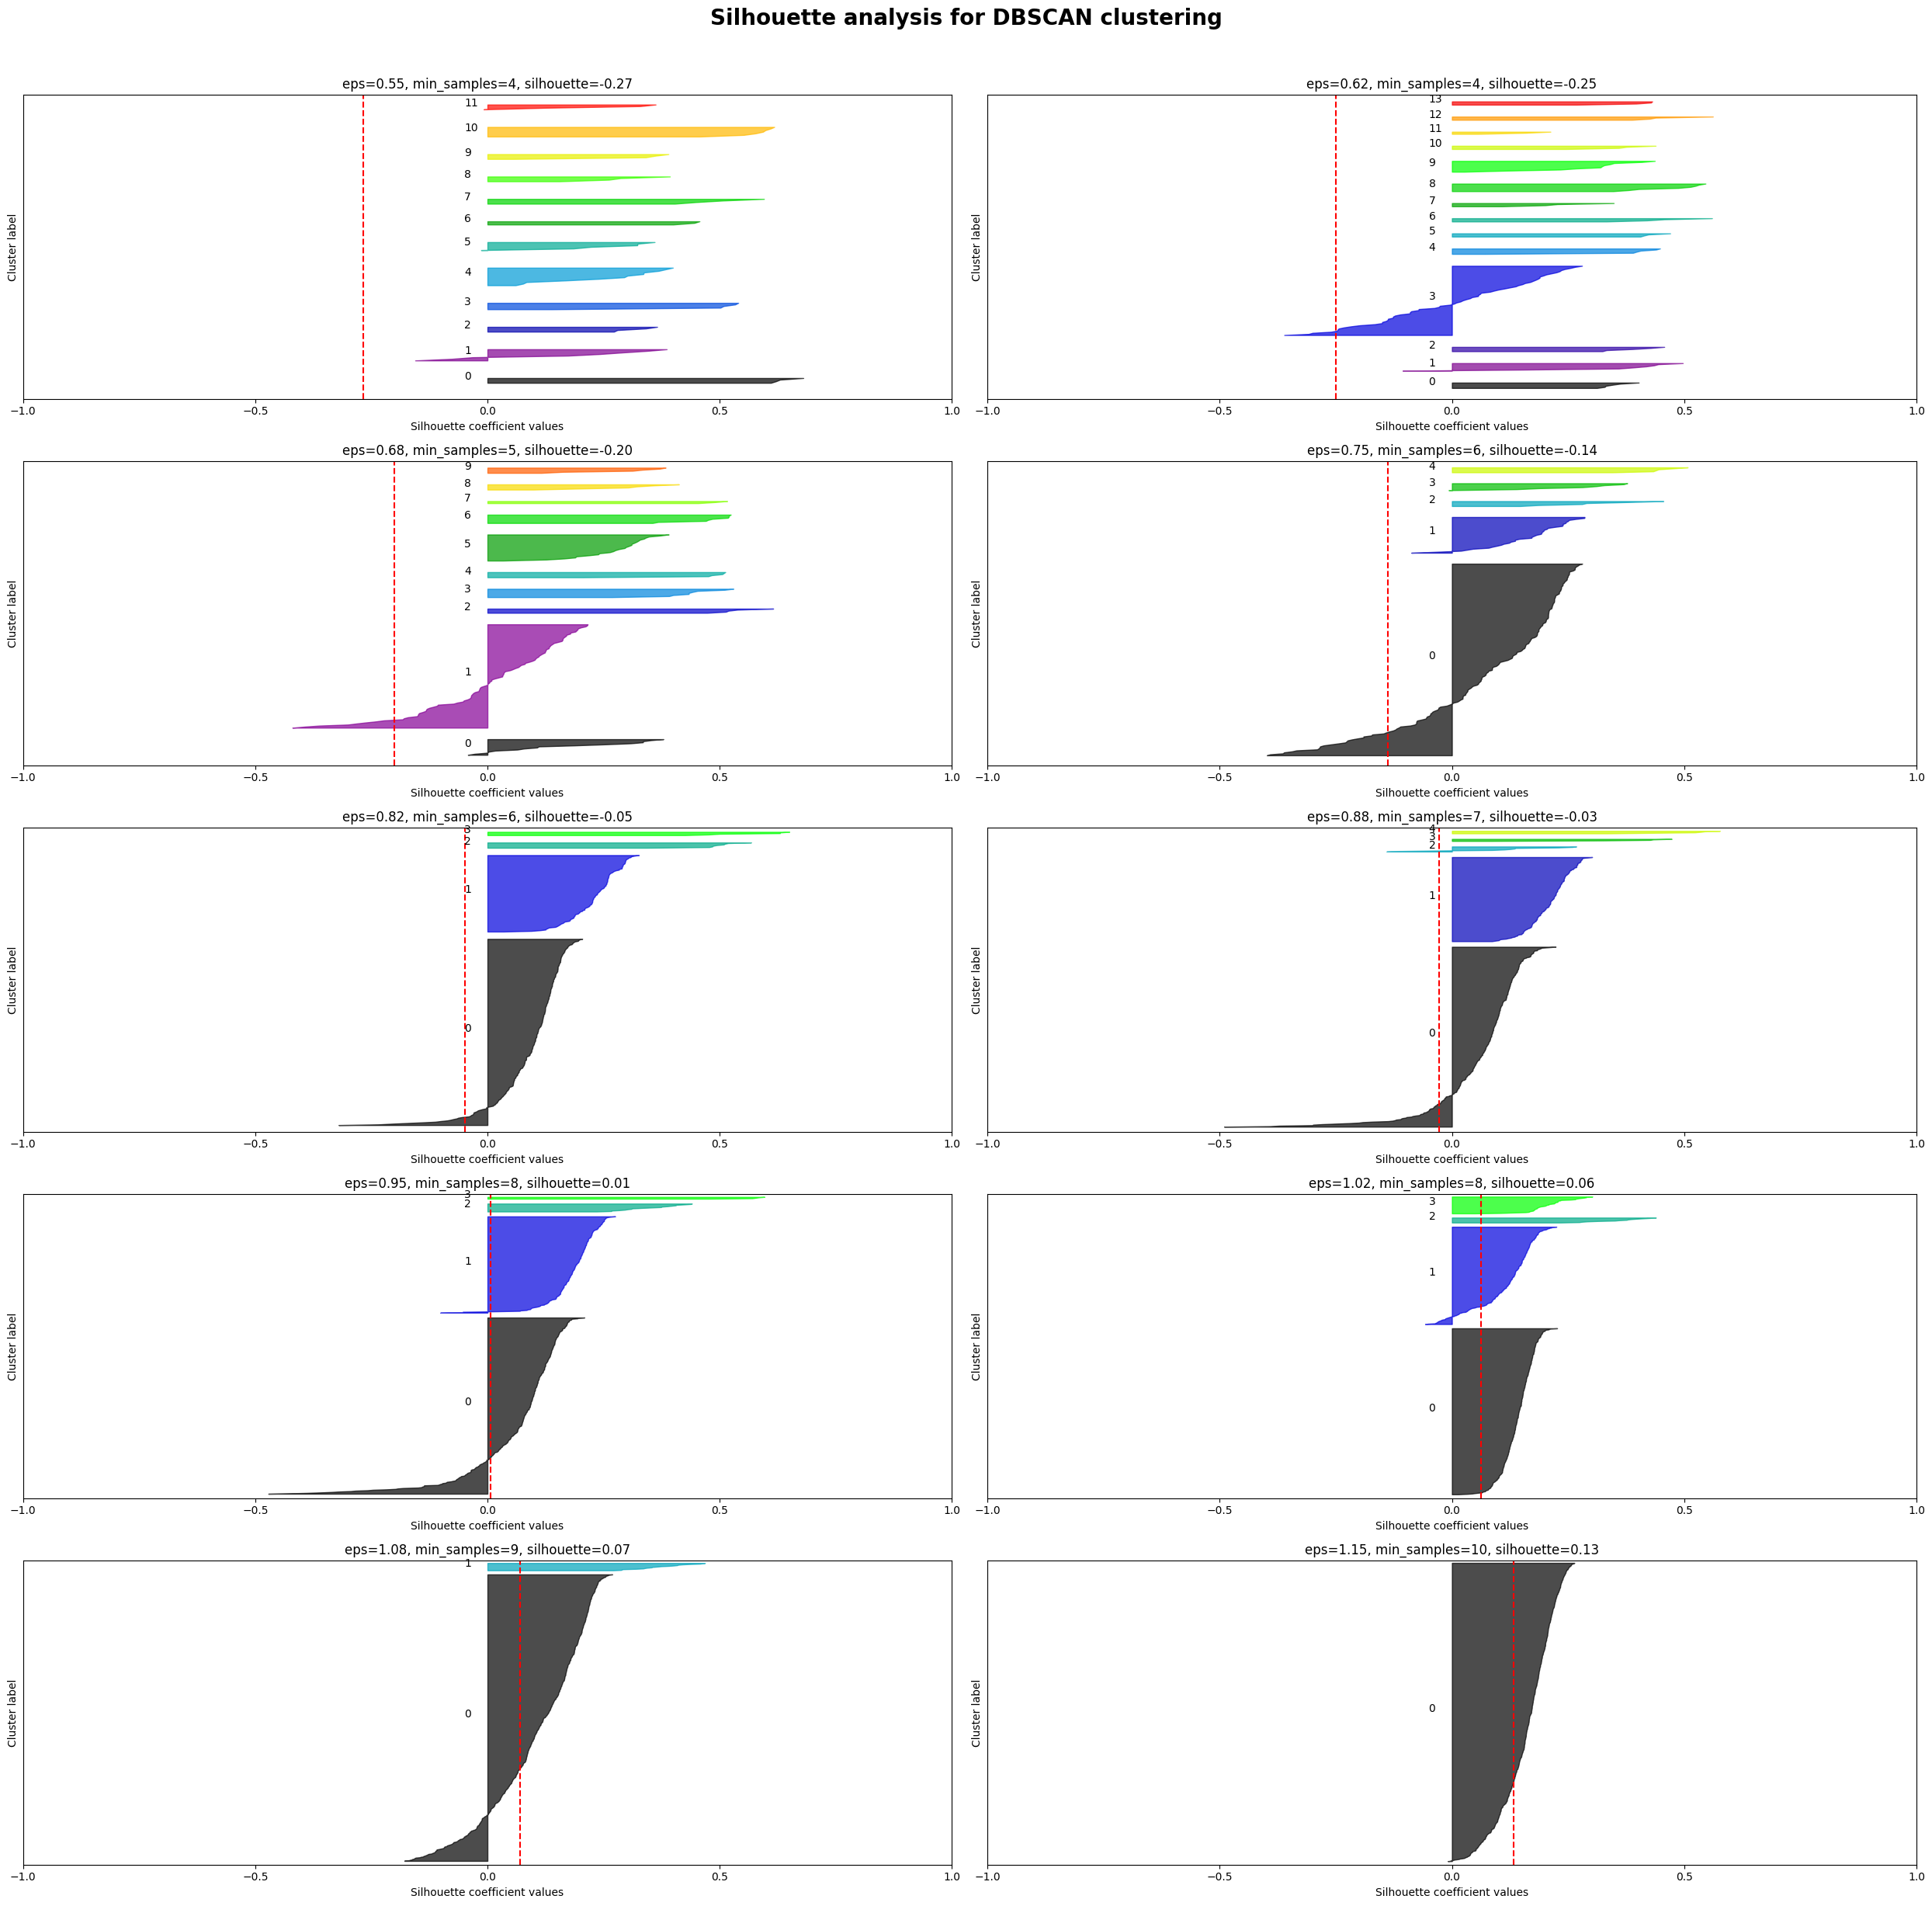

In [248]:
# Suponemos que 'X' es tu matriz de datos.

nrows = 5
ncols = 2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(25, 25))

# Supongamos algunos valores para eps y min_samples
eps_values = np.linspace(0.55, 1.15, nrows*ncols)
min_samples_values = np.linspace(4, 10, nrows*ncols, dtype=int)

plot_number = 0

for eps, min_samples in zip(eps_values, min_samples_values):
    ax_row = plot_number // ncols
    ax_column = plot_number % ncols
    ax1 = ax[ax_row, ax_column]

    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + len(np.unique(eps_values)) * 10])

    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)

    # Filtramos las muestras de ruido antes de calcular la puntuación de silueta
    if len(np.unique(cluster_labels)) > 1:  # Asegurar que haya más de un clúster (excluyendo el ruido)
        silhouette_avg = silhouette_score(X, cluster_labels)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in np.unique(cluster_labels):
            if i == -1:
                continue  # Saltar el ruido
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / len(np.unique(cluster_labels)))
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title(f"eps={eps:.2f}, min_samples={min_samples}, silhouette={silhouette_avg:.2f}")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        plot_number += 1
    else:
        ax1.text(0.5, 0.5, 'No valid clustering', verticalalignment='center', horizontalalignment='center', transform=ax1.transAxes)

    ax1.set_ylim([0, y_upper + 5])  # Ajustar el ylim basado en el último y_upper calculado
    ax1.set_yticks([])
    ax1.set_xticks([-1, -0.5, 0, 0.5, 1])



fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Silhouette analysis for DBSCAN clustering", fontsize=20, fontweight='bold')
plt.show()

## Elección de modelo

In [289]:
n_clusters = 4

# Inicialice el clusterer con el valor n_clusters y un generador aleatorio
# semilla de 10 para reproducibilidad.
clusterer = KMeans(n_clusters=n_clusters, n_init='auto', random_state=10)
cluster_labels = clusterer.fit_predict(X)

In [290]:
pd.Series(cluster_labels).value_counts()

0    329
2    267
1    214
3    190
Name: count, dtype: int64

## Reducción de dimesionalidad

In [298]:
X_pca = X.copy()

# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_pca)
# Mostramos el porcentaje de varianza explicada por cada uno de los componentes seleccionados.
print(pca.explained_variance_ratio_)

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index=X.columns)

[0.15393208 0.11108865]


,PC-1,PC-2
Attribute1,0.199861,0.748273
Attribute2,0.088133,-0.071907
Attribute3,0.066561,0.167316
Attribute4,0.047271,-0.027820
Attribute5,0.098142,-0.065454
Attribute6,0.224042,0.500731
Attribute7,0.143612,0.125460
Attribute8,0.075894,0.016311
Attribute9,0.026376,0.030563
Attribute10,-0.077952,-0.067664


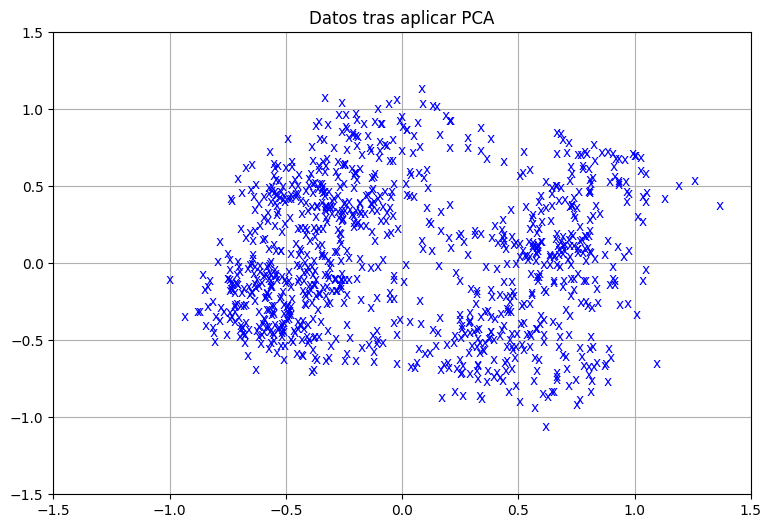

In [299]:
# Visualizar el dataset utilizando las dos dimensiones obtenidas en el PCA
plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color="b")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title("Datos tras aplicar PCA")
plt.grid()
plt.show()

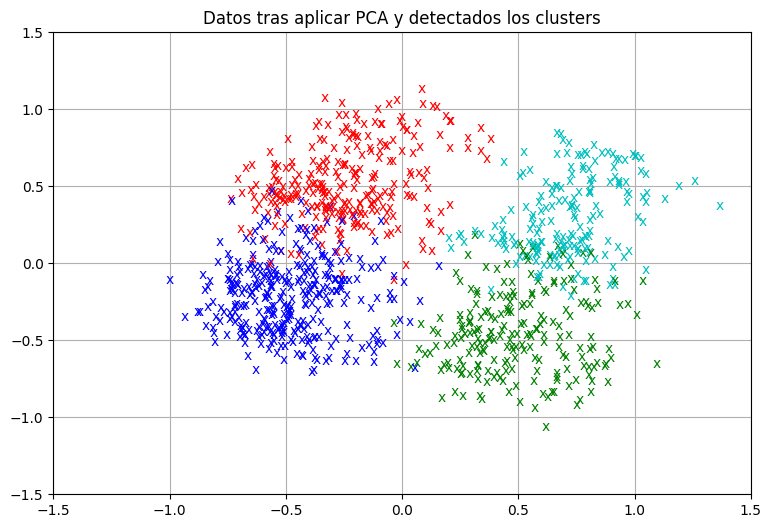

In [302]:
colores = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colores = np.hstack([colores] * 20)

plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colores[cluster_labels[i]])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.title("Datos tras aplicar PCA y detectados los clusters")
plt.show()

In [316]:
X_pca = X.copy()

# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_pca)
# Mostramos el porcentaje de varianza explicada por cada uno de los componentes seleccionados.
print(pca.explained_variance_ratio_)

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2', 'PC-3'], index=X.columns)

[0.15393258 0.11108871 0.09185082]


,PC-1,PC-2,PC-3
Attribute1,0.200003,0.748326,-0.208522
Attribute2,0.088062,-0.071913,0.039053
Attribute3,0.066221,0.167160,0.027877
Attribute4,0.046918,-0.027981,-0.032378
Attribute5,0.098076,-0.065447,-0.028963
Attribute6,0.223873,0.500687,0.167979
Attribute7,0.144017,0.125551,0.342875
Attribute8,0.076007,0.016357,0.324388
Attribute9,0.026146,0.030123,0.071431
Attribute10,-0.078019,-0.067536,-0.002403


In [320]:
pd.DataFrame(X_pca)

,0,1,2
0,0.648615,0.088551,0.386099
1,-0.635735,-0.169626,-0.401711
2,-0.411400,0.555429,0.146477
3,-0.395286,-0.504225,0.691127
4,-0.143515,-0.498400,0.944353
...,...,...,...
995,-0.433159,0.442931,0.044376
996,0.428617,-0.725689,-0.019616
997,-0.098971,0.337694,0.442499
998,0.624733,-0.860567,0.266678


KeyError: 'PC-1'

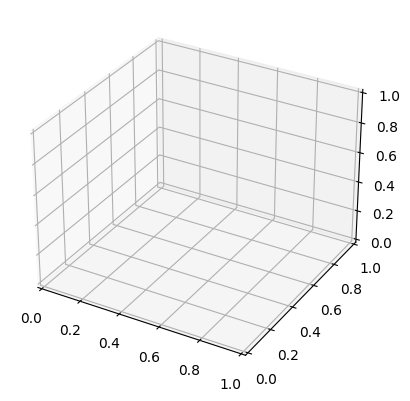

In [321]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca['PC-1'], X_pca['PC-2'], X_pca['PC-3'], c=clusters)
ax.set_xlabel("PC-1")
ax.set_ylabel("PC-2")
ax.set_zlabel("PC-3")
plt.show()

# Exportar a excel

In [308]:
data_output = data.copy()
data_output['class'] = cluster_labels
data_output

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,0.000000,0.029412,1.00,0.333333,0.050567,1.00,1.00,1.000000,0.666667,0.0,...,0.000000,0.857143,1.0,0.5,0.333333,0.666667,0.0,1.0,0.0,1
1,0.333333,0.647059,0.50,0.333333,0.313690,0.00,0.50,0.333333,0.333333,0.0,...,0.000000,0.053571,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0
2,1.000000,0.117647,1.00,0.666667,0.101574,0.00,0.75,0.333333,0.666667,0.0,...,0.000000,0.535714,1.0,0.5,0.000000,0.333333,1.0,0.0,0.0,2
3,0.000000,0.558824,0.50,0.222222,0.419941,0.00,0.75,0.333333,0.666667,1.0,...,0.333333,0.464286,1.0,1.0,0.000000,0.666667,1.0,0.0,0.0,0
4,0.000000,0.294118,0.75,0.000000,0.254209,0.00,0.50,0.666667,0.666667,0.0,...,1.000000,0.607143,1.0,1.0,0.333333,0.666667,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.50,0.222222,0.081765,0.00,0.75,0.666667,0.333333,0.0,...,0.000000,0.214286,1.0,0.5,0.000000,0.333333,0.0,0.0,0.0,2
996,0.000000,0.382353,0.50,0.111111,0.198470,0.00,0.50,1.000000,0.000000,0.0,...,0.333333,0.375000,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,1
997,1.000000,0.117647,0.50,0.333333,0.030483,0.00,1.00,1.000000,0.666667,0.0,...,0.666667,0.339286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,2
998,0.000000,0.602941,0.50,0.333333,0.087763,0.00,0.50,1.000000,0.666667,0.0,...,1.000000,0.071429,1.0,1.0,0.000000,0.666667,0.0,1.0,0.0,1


In [309]:
data.to_excel('grouped_clients.xlsx')